# Melanie Schwartz - sno122
DS 4033
Dr. Acosta
3/29/2024

Estimated increase in home price per additional bedroom: $56,200.08


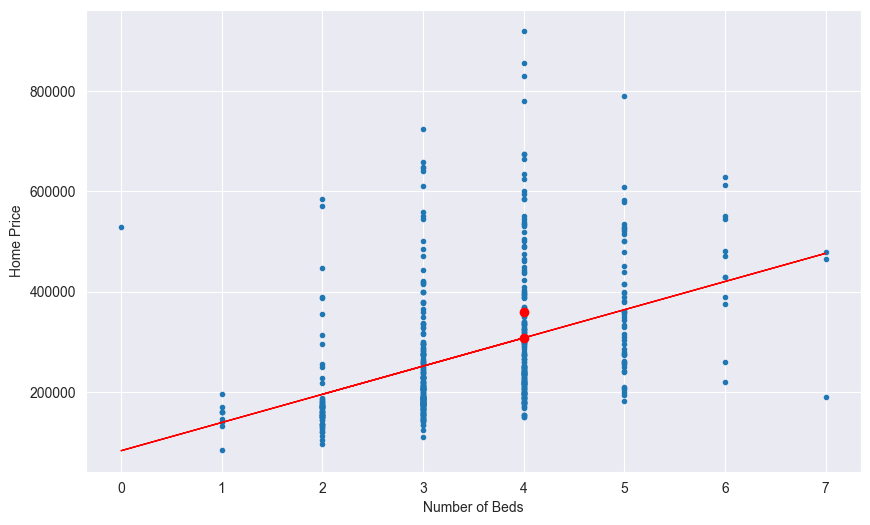

In [250]:
# TODO: a) (10 pts.) Build a simple linear regression model to predict home prices using as predictor the number of bedrooms. What is the estimated increase in the average price of a house for each additional bedroom?
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Load CSV
df1 = pd.read_csv('homes.csv')  

# Define the target var ('price') and the predictor ('beds')
Price = df1['price']
Beds = df1["beds"]

# Convert the predictor 
Beds = pd.DataFrame(Beds)

# Regression model 
m1 = LinearRegression().fit(Beds, Price)

# Generate predictions 
yhat = m1.predict(Beds)

# Create a copy of the original dataframe for predictiosn
df2 = df1.copy()
df2['prediction'] = yhat

# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(Beds, Price, s=9)
plt.plot(Beds, yhat, color='red', linewidth=1.0)
plt.ylabel('Home Price')
plt.xlabel('Number of Beds')
plt.grid(True)  

# Demonstrate actual and predicted value 
# Actual price for the first house
plt.scatter(Beds.iloc[0], Price[0], c='red')  
# Predicted price for the first house
plt.scatter(Beds.iloc[0], yhat[0], color='red')  

estimated_increase = m1.coef_[0]
print(f"Estimated increase in home price per additional bedroom: ${estimated_increase:,.2f}")

In [251]:
# TODO: Q1.b) Build a multiple linear regression (MLR) model to predict home prices using as predictors: lot size (square feet), area (square feet), number of bedrooms, number of bathrooms, and, garage size. What is the estimated increase in the average price of a house for each additional bedroom?
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Select predictors and target vars
X = df1[['lotsize', 'area', 'beds', 'baths', 'garage']]
y = df1['price']

# Split data into training and testing sets for 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients of each predictor
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# MSE and R^2 score
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')
print('Coefficients:')
print(coefficients)

# Average increase in price for each additional bed
estimated_increase_per_bedroom = model.coef_[4] / X['beds'].mean()  
print(f"Estimate increase in the average price of a house for each additional bedroom: ${estimated_increase_per_bedroom:.2f}")

Mean Squared Error (MSE): 7212400120.536867
R^2 Score: 0.6904117728319694
Coefficients:
          Coefficient
lotsize      1.431594
area       120.615445
beds     -8932.277619
baths    17334.837814
garage   34043.031619
Estimate increase in the average price of a house for each additional bedroom: $9807.10


In [252]:
# TODO: Q1.c) (20 pts.) Use the MLR model to predict the price of a house on a lot of 24500 square feet, with an area of 2650 square feet, with 3 bedrooms and 3 baths, and garage for two cars.
# predictor variables and the target vars
X = df1[['lotsize', 'area', 'beds', 'baths', 'garage']]
y = df1['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predict the price with the expected features
new_house = pd.DataFrame({
    'lotsize': [24500],
    'area': [2650],
    'beds': [3],
    'baths': [3],
    'garage': [2]
})

predicted_price = mlr_model.predict(new_house)
print(f"Predicted price of the custom house: ${predicted_price[0]:,.2f}")

Predicted price of the custom house: $323,638.80


In [253]:
# TODO: Q2.a) (10 pts.) Use df2 = pd.get_dummies(df, columns=[’sex’, ’smoker’],drop_first=True) to trans- form the categorical variables sex and smoker to numeric (0/1). Display the first five patients.
# Load the dataset
df = pd.read_csv('insurance.csv')

# Transform the 'sex' and 'smoker' columns to numeric 
df2 = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

# First 5 patients
print(df2.head())

   age   bmi  children  expenses  sex_male  smoker_yes
0   19  27.9         0  16884.92     False        True
1   18  33.8         1   1725.55      True       False
2   28  33.0         3   4449.46      True       False
3   33  22.7         0  21984.47      True       False
4   32  28.9         0   3866.86      True       False


In [254]:
# TODO: Q2.b) (10 pts.) Build a regression model with the five predictors. Report the R-square and adjusted R-squared.
# Select predictors and target variable
X = df2[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
y = df2['expenses']

# Split data into training and testing sets for 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Calculate the number of observations (n) and predictors (k)
n = len(X)
k = X.shape[1]
# Calculate adjusted R-squared
# Source: https://www.listendata.com/2014/08/adjusted-r-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'R^2 Score: {r2}')
print(f'Adjusted R^2 Score: {adjusted_r2}')

R^2 Score: 0.7681076791920676
Adjusted R^2 Score: 0.7672372125223681


In [255]:
# TODO: Q2.c) (10 pts.) To improve the model create a binary variable BMI_ind equal to 1 if the patient BMI is at least 30, and equal to 0 otherwise.
# Create BMI indicator 
df2['BMI_ind'] = (df2['bmi'] >= 30).astype(int)

# Select predictors including the new BMI_ind variable and target variable
X = df2[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'BMI_ind']]
y = df2['expenses']

# Split data into training and testing sets for 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Calculate the number of observations (n) and predictors (k)
n = len(X)
k = X.shape[1]

# Calculate adjusted R-squared
# Source: https://www.listendata.com/2014/08/adjusted-r-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'R^2 Score: {r2}')
print(f'Adjusted R^2 Score: {adjusted_r2}')

R^2 Score: 0.7688475627221669
Adjusted R^2 Score: 0.7678055532378191


In [256]:
# TODO: Q2.d) (10 pts.) Further improve the model creating a variable BMI_ind_smoker for the interaction between BMI_ind and smoker.
# Create interaction variable BMI_ind_smoker
df2['BMI_ind_smoker'] = df2['BMI_ind'] * df2['smoker_yes']

# Select predictors w/ the new BMI_ind and BMI_ind_smoker vars, and target var
X = df2[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'BMI_ind', 'BMI_ind_smoker']]
y = df2['expenses']

print(df2.head())

   age   bmi  children  expenses  sex_male  smoker_yes  BMI_ind  \
0   19  27.9         0  16884.92     False        True        0   
1   18  33.8         1   1725.55      True       False        1   
2   28  33.0         3   4449.46      True       False        1   
3   33  22.7         0  21984.47      True       False        0   
4   32  28.9         0   3866.86      True       False        0   

   BMI_ind_smoker  
0               0  
1               0  
2               0  
3               0  
4               0  


In [257]:
# TODO: Q2.e) (10 pts.) Build a regression model with the seven predictors. Report R-square and adjusted R-squared.
# Split data into training and testing sets for 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Calculate the number of observations (n) and predictors (k)
n = len(X)
k = X.shape[1]

# Calculate adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'R^2 Score: {r2}')
print(f'Adjusted R^2 Score: {adjusted_r2}')

R^2 Score: 0.8701113241449717
Adjusted R^2 Score: 0.8694276995352084
